<a href="https://colab.research.google.com/github/mahmud-nobe/Cluster-Membership/blob/master/NGC_6231/NGC_6231.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Necessary Packages and download the csv files

#### Importing packages

In [1]:
# import packages
import pandas as pd
import pandas_profiling as pd_prof
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for downloading file
from google.colab import files

## Use random forest to create and evaluate new model
from sklearn.ensemble import RandomForestRegressor

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!pip install astroquery

     |████████████████████████████████| 4.5MB 45kB/s 
     |████████████████████████████████| 2.7MB 48.3MB/s 
  Created wheel for astroquery: filename=astroquery-0.4-cp36-none-any.whl size=3582510 sha256=a996f59dffd50b3926a36f72dc52a3714db5d84302ecbc45aeb64fd976fd8afa
  Stored in directory: /root/.cache/pip/wheels/a3/6d/9d/f6ceddc68de0e4b7a64b56d6e8c8075e6ef6377ec9c05ce128
Successfully built astroquery


In [3]:
# import astroquery
import astropy.units as u
import astropy.coordinates as coord
from astroquery.gaia import Gaia
from astroquery.vizier import Vizier


Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


#### Finding GAIA Data

In [4]:
## making a GAIA cone_search of 30m radius around NGC6231 center

coordinate = coord.SkyCoord.from_name('NGC6231')
print(coordinate)
radius = u.Quantity(0.5, u.deg)
j = Gaia.cone_search_async(coordinate, radius)
r = j.get_results()
print(type(r))

<SkyCoord (ICRS): (ra, dec) in deg
    (253.53545833, -41.82666667)>
INFO: Query finished. [astroquery.utils.tap.core]
<class 'astropy.table.table.Table'>


In [5]:
## save the ASCII table as a panadas dataframe
all_stars = r.to_pandas()
all_stars

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: TableReplaceWarning: converted column 'priam_flags' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: TableReplaceWarning: converted column 'flame_flags' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)


,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist
0,1635721458409799680,b'Gaia DR2 5966509846818679680',5966509846818679680,1361430196,2015.5,253.535948,0.129177,-41.828117,0.101217,0.373578,0.109698,3.405523,-0.251845,0.303577,-2.123356,0.177563,0.543667,0.280317,-0.585969,-0.507726,0.059835,-0.583171,-0.779288,-0.322748,0.024545,0.605362,170,0,170,0,2.905045,222.783508,0.323814,2.596213,31,False,2.333645,1.413386,0.022658,0.190977,...,4514.689181,851.515446,5.301946,15.625350,2.803340,0,0.745122,-0.622978,1.368100,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',343.459247,1.185433,257.084064,-19.124220,102011.0,5095.633301,4297.500000,6938.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.001498
1,1635721458409799680,b'Gaia DR2 5966509851108054016',5966509851108054016,111247073,2015.5,253.533661,0.400825,-41.825672,0.424710,-0.745005,0.652348,-1.142036,-2.222224,1.098430,-6.834229,1.054830,-0.060677,0.309571,0.159486,0.270091,-0.647966,-0.220034,-0.585373,0.290158,0.684820,0.604562,116,0,115,1,2.225698,145.619812,1.076680,1.766340,31,False,0.159604,1.353609,0.104962,0.016528,...,550.797062,30.571649,18.016596,17.909441,3.044842,0,0.624971,-0.775417,1.400389,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',343.460069,1.188297,257.081964,-19.121996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.001671
2,1635721458409799680,b'Gaia DR2 5966509846818678528',5966509846818678528,1212321597,2015.5,253.534740,2.762316,-41.828398,2.171251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.944498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72,0,70,2,4.288782,126.146980,1.594898,7.140488,3,False,0.212628,NaN,NaN,0.214469,...,1413.189375,18.443649,76.622009,16.886419,2.236178,0,1.848509,0.344460,1.504049,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',343.458461,1.185955,257.083154,-19.124606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.001818
3,1635721458409799680,b'Gaia DR2 5966509851122012288',5966509851122012288,1592357776,2015.5,253.534654,13.799354,-41.829497,4.608760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.776655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79,0,77,2,3.241103,117.390808,1.090626,4.188075,3,False,0.319843,NaN,NaN,0.118872,...,1213.376667,189.336804,6.408562,17.051931,2.098466,0,1.798573,0.375666,1.422907,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',343.457567,1.185312,257.083224,-19.125705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.002899
4,1635721458409799680,b'Gaia DR2 5966509782401686400',5966509782401686400,1496891344,2015.5,253.538409,7.983613,-41.828788,2.592427,NaN,NaN

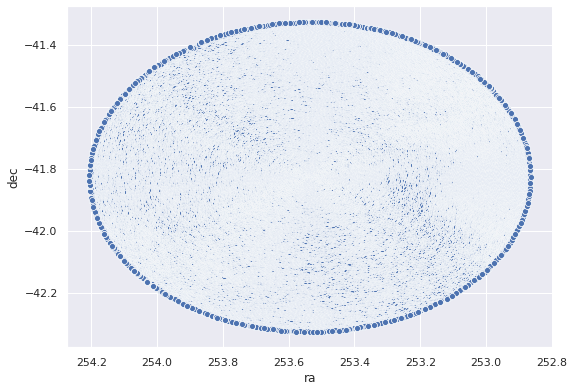

In [6]:
## plotting the skyplot 

sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot(all_stars['ra'], all_stars['dec'])
skyplot.invert_xaxis()

#### Finding Cantat Data

In [7]:
#### Finding Cantat catalogue

catalog_list = Vizier.find_catalogs('Cantat')
{k:v.description for k,v in catalog_list.items()}

{'I/349': 'StarHorse, Gaia DR2 photo-astrometric distances (Anders+, 2019)',
 'J/A+A/561/A94': 'Velocities and photometry in Trumpler 20 (Donati+, 2014)',
 'J/A+A/564/A133': 'Gaia FGK benchmark stars: metallicity (Jofre+, 2014)',
 'J/A+A/569/A17': 'Gaia-ESO Survey: NGC6705 (Cantat-Gaudin+, 2014)',
 'J/A+A/582/A81': 'Gaia FGK benchmark stars: abundances (Jofre+, 2015)',
 'J/A+A/588/A120': 'Equivalent widths in 10 open clusters (Cantat-Gaudin+, 2016)',
 'J/A+A/591/A37': 'Gaia-ESO Survey. Parameters for cluster members (Jacobson+, 2016)',
 'J/A+A/597/A10': 'South Ecliptic Pole stars radial velocities (Fremat+, 2017)',
 'J/A+A/598/A68': 'Gaia-ESO Survey. Trumpler 23 (Overbeek+, 2017)',
 'J/A+A/601/A19': 'Gaia DR1 open cluster members (Gaia Collaboration+, 2017)',
 'J/A+A/603/A2': 'Gaia-ESO Survey abundances radial distribution (Magrini+, 2017)',
 'J/A+A/605/A79': 'TGAS Cepheids and RR Lyrae stars (Gaia Collaboration+, 2017)',
 'J/A+A/615/A49': 'TGAS stars membership in 128 open clusters (C

In [8]:
## cheking the tables in the GAIA DR2 paper

Vizier.ROW_LIMIT = -1
catalogs = Vizier.get_catalogs(catalog_list['J/A+A/633/A99'])
catalogs

TableList with 2 tables:
	'0:J/A+A/633/A99/table1' with 20 column(s) and 1481 row(s) 
	'1:J/A+A/633/A99/members' with 13 column(s) and 435833 row(s) 

In [0]:
## saving the whole cantat table 
## comment out the next two line if you want to save the full cantat table

# cantat_all = catalogs['J/A+A/633/A99/members'].to_pandas()
# cantat_all.to_csv('cantat_all.csv')

In [0]:
# help(Vizier)

In [11]:
## saving only NGC 6231 data from Cantat

cantat_6231 = Vizier(catalog = 'J/A+A/633/A99/members', row_limit = -1).query_constraints(Cluster="NGC_6231")
cantat_6231 = cantat_6231[0].to_pandas()
cantat_6231

,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,RV,Gmag,BP-RP,Proba,Cluster,_RA.icrs,_DE.icrs
0,253.132848,-41.861961,5965017465938774912,0.6620,-0.563,-2.369,NaN,14.281500,1.2256,0.7,b'NGC_6231',253.132851,-41.861951
1,253.201303,-41.955200,5965015919750155776,0.5506,-0.890,-2.207,NaN,13.564100,0.8036,0.4,b'NGC_6231',253.201309,-41.955191
2,253.168852,-41.849690,5965017397219299456,0.7014,-0.938,-2.106,NaN,15.016800,1.3637,0.5,b'NGC_6231',253.168857,-41.849681
3,253.195016,-41.919190,5965016405090411904,0.4986,-0.456,-2.189,NaN,16.772200,1.8739,0.6,b'NGC_6231',253.195019,-41.919181
4,253.169682,-41.909035,5965016783047540608,0.5738,-0.563,-1.944,NaN,15.530700,1.6979,0.4,b'NGC_6231',253.169685,-41.909027
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1575,253.799898,-42.188102,5966448003577519616,0.5505,-0.183,-2.782,NaN,17.665400,1.7170,0.2,b'NGC_6231',253.799899,-42.188090
1576,253.928626,-42.079932,5966453054470707072,0.6383,-0.194,-1.632,NaN,17.237301,2.8719,0.1,b'NGC_6231',253.928627,-42.079925
1577,253.841437,-42.065966,5966450340039976064,0.4553,-1.162,-2.968,NaN,17.821899,1.9168,0.2,b'NGC_6231',253.841444,-42.065953
1578,253.802264,-42.156706,5966450374411114752,0.6002,-0.381,-2.346,NaN,14.170600,1.0223,1.0,b'NGC_6231',253.802266,-42.156696


In [0]:
# renaming the cantat table to match it with gaia_data
cantat_6231 = cantat_6231.rename(columns={'Source':'source_id',
                                          'Proba':'PMemb'})


In [0]:
# taking the subset of only source_id and PMemb
cantat_6231 = cantat_6231.loc[:,['source_id', 'PMemb']]


In [0]:
# join the two table on source_id
cantat_6231 = all_stars.join(cantat_6231.set_index('source_id'), on='source_id')

In [15]:
# dropping the rows, where we don't have PMemb 
# (i.e. the source id was not in the cantat table)
cantat_6231 = cantat_6231.dropna(subset=['PMemb'])
cantat_6231

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,PMemb
10,1635721458409799680,b'Gaia DR2 5966509885480902656',5966509885480902656,75674766,2015.5,253.541922,0.056999,-41.825049,0.043726,0.588630,0.058279,10.100193,-0.201992,0.109771,-2.076847,0.074812,0.125070,-0.217714,-0.378112,-0.167505,-0.118284,-0.103722,-0.684189,-0.034273,0.221695,0.002434,262,262,247,15,23.867315,1236.423462,0.180424,12.504582,31,False,25.615211,1.680406,0.011212,0.109587,...,110260.459740,353.238342,5.785701,1.167947,0,0.298518,0.111281,0.187237,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',343.464436,1.183913,257.088354,-19.120643,100001.0,7947.000000,7780.500000,8207.500000,0.2653,0.0740,0.6331,0.1430,0.0366,0.3428,200111.0,50.211166,47.074417,52.383160,9059.582031,7871.937500,10247.226562,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.005072,0.8
19,1635721458409799680,b'Gaia DR2 5966509846818671872',5966509846818671872,994196143,2015.5,253.528953,0.042003,-41.823165,0.035386,0.500177,0.045313,11.038198,-0.618120,0.082720,-2.014752,0.060212,-0.022583,-0.186666,-0.400981,-0.029362,-0.225033,0.053416,-0.741887,-0.073413,0.306280,-0.143106,251,251,242,9,15.661293,766.168457,0.059859,1.374822,31,True,123.496727,1.711654,0.008832,0.089753,...,1345.264014,1157.074707,9.281498,1.170590,1,0.266615,0.095115,0.171500,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',343.459803,1.192602,257.077960,-19.119925,100002.0,8385.000000,8145.500000,8634.250000,0.8830,0.7589,1.0181,0.4583,0.3856,0.5190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.005984,0.6
29,1635721458409799680,b'Gaia DR2 5966509885480897792',5966509885480897792,311166037,2015.5,253.545663,0.054755,-41.827538,0.041098,0.522328,0.056883,9.182508,-0.739185,0.107318,-1.904268,0.071091,0.187194,-0.318994,-0.248488,-0.154496,-0.269648,-0.010938,-0.723689,-0.108310,0.321772,0.060399,214,214,204,10,15.438690,691.698792,0.087285,2.596582,31,False,77.344505,1.668033,0.010306,0.174881,...,637.989622,1397.161743,9.886769,1.174598,0,0.344581,0.125320,0.219260,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',343.464262,1.180180,257.091598,-19.122782,100001.0,8046.500000,7834.000000,8446.000000,0.6690,0.4880,1.0634,0.3483,0.2662,0.5140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.007647,0.5
33,1635721458409799680,b'Gaia DR2 5966509782401678592',5966509782401678592,1377352669,2015.5,253.541979,0.034195,-41.833184,0.026995,0.555860,0.040938,13.577954,-0.352738,0.086079,-1.966265,0.044477,-0.285745,-0.232036,-0.156301,0.074591,0.112695,-0.028142,-0.646295,0.319773,0.021373,-0.109480,129,0,129,0,-1.312545,103.863762,0.000000,0.000000,31,False,115.166115,1.674507,0.006070,-0.040703,...,330.283535,164.282761,12.925723,1.211719,0,0.516440,0.171193,0.345247

In [0]:
# saving both cantat and Gaia files as csv
# if you want to save, comment out the next two lines

cantat_6231.to_csv('NGC_6231_cantat.csv')
# all_stars.to_csv('NGC_6231_Gaia_30m.csv')

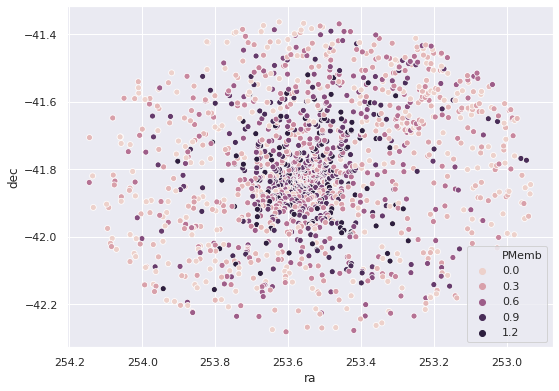

In [17]:
## plotting the skyplot 

skyplot = sns.scatterplot(cantat_6231['ra'], cantat_6231['dec'], hue = cantat_6231['PMemb'])
skyplot.invert_xaxis()

### Examining the Training Data

Separating the predictors (features) and the output (target, here PMemb) from the dataset and train the random forest model.

In [0]:
# import member dataset
member = cantat_6231

In [19]:
# Examining the descriptive statistics of each column
# (Notice BP-RP column has 9 less observation)
member.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,PMemb
count,1.580000e+03,1.580000e+03,1.580000e+03,1580.0,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1.580000e+03,1580.0,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,...,1566.000000,1580.000000,1.566000e+03,1566.000000,1566.000000,1566.000000,1566.000000,1580.000000,1566.000000,1566.000000,1566.000000,9.000000,9.000000,1580.000000,9.000000,9.000000,9.000000,1580.000000,1580.000000,1580.000000,1580.000000,1083.000000,1083.000000,1083.000000,1083.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,811.0,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,1580.000000,1580.000000
mean,1.635721e+18,5.966777e+18,8.573163e+08,2015.5,253.526296,0.080140,-41.796666,0.066531,0.580582,0.092637,8.996444,-0.593184,0.169760,-2.169458,0.118343,0.086909,-0.171935,-0.295309,-0.097723,-0.275163,-0.022732,-0.713938,-0.148311,0.365673,0.033076,198.854430,30.893671,197.177215,1.677215,2.273248,270.693878,0.124346,1.935921e+00,31.0,54.530579,1.469439,0.016071,0.095778,22.700000,11.087342,...,16.167006,21.015823,1.946679e+05,552.200162,413.097931,14.589313,1.358732,0.118987,1.577686,0.740594,0.837092,-40.064345,2.654596,0.032911,4944.444336,3.055556,-0.166667,343.478886,1.210767,257.072509,-19.094001,100106.397969,5204.823730,4982.423340,5544.394043,1.860792,1.554186,2.163760,0.937166,0.777019,1.094345,200111.0,3.651327,3.259030,3.949239,68.250198,58.908226,77.592224,0.224395,0.487215
std,0.000000e+00,1.078450e+15,4.764143e+08,0.0,0.232189,0.048331,0.194087,0.039327,0.080668,0.055667,5.454489,0.357242,0.111263,0.333601,0.071889,0.189607,0.163353,0.196493,0.162895,0.158466,0.176634,0.083065,0.139082,0.132372,0.241784,31.085395,75.480475,30.417866,2.763347,6.015348,315.855042,0.194258,1.058530e+01,0.0,98.556709,0.129758,0.009690,0.057908,3.544863,0.981768,...,2.587196,5.144930,1.586840e+06,4956.763339,390.964050,2.005230,0.152253,0.346548,0.754850,0.469122,0.312959,43.334732,4.961407,0.475018,634.647766,0.166667,0.500000,0.170287,0.196591,0.187618,0.190261,446.780835,1391.591309,1348.295654,1424.386353,0.745452,0.767743,0.753557,0.378802,0.387698,0.387486,0.0,4.277451,3.951248,4.514437,534.412964,459.990906,609.025757,0.134840,0.304413
min,1.635721e+18,5.964990e+18,1.993672e+06,2015.5,252.934608,0.021023,-42.281842,0.018408,0.422281,0.023844,1.541709,-1.561498,0.042337,-3.133929,0.031957,-0.869595,-0.850281,-0.929521,-0.867894,-0.78

In [20]:
# correlation of PMemb with other variables
member.corr().PMemb.dropna().sort_values()

rv_template_fe_h                  -0.763717
astrometric_pseudo_colour_error   -0.487669
ra_error                          -0.480715
parallax_error                    -0.474684
g_rp                              -0.472257
                                     ...   
parallax_over_error                0.524552
radial_velocity_error              0.700788
rv_template_logg                   0.763717
rv_template_teff                   0.821169
PMemb                              1.000000
Name: PMemb, Length: 89, dtype: float64

In [0]:
### adding their distance from the center of the clusters

## NGC 6231
center = coord.SkyCoord.from_name('NGC6231')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( (member['ra'] - center_ra)**2 + (member['dec'] - center_dec)**2 )
member['dist_6231_center'] = distance

In [0]:
# Choosing the predictors
# Usual Parameters

feature_columns = ['ra', 'dec', 'ra_error', 'dec_error', 
                   'parallax', 'parallax_error', 'parallax_over_error',
                   'pmra', 'pmra_error', 'pmdec', 'pmdec_error',
                   'phot_g_mean_mag', 'bp_rp', 'dist_6231_center']

features = member.loc[:,feature_columns]
targets = member['PMemb']

In [23]:
# Dropping the NULL values from the using training set
# adding features and targets in a training set
training_set = pd.concat((features, targets), axis=1)

# dropping NA
training_set = training_set.dropna()

# finding where dtype is float64 as the built-in radom forest package 
# don't take 64-bit-float
float64_data = np.where(training_set.dtypes == 'float64')[0] 

# change the data type to float32 from float64
training_set.iloc[:, float64_data] = training_set.iloc[:, float64_data].astype('float32')


# set features, targets again
features, targets = training_set.iloc[:,:-1], training_set.iloc[:,-1]

features.describe()

,ra,dec,ra_error,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,phot_g_mean_mag,bp_rp,dist_6231_center
count,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000
mean,253.526566,-41.797462,0.079562,0.066172,0.580842,0.092390,9.007782,-0.593504,0.168606,-2.168937,0.117732,15.426398,1.577686,0.259002
std,0.232108,0.194051,0.047082,0.038810,0.080581,0.055543,5.444337,0.356973,0.108939,0.334047,0.071114,2.267118,0.754850,0.159159
min,252.934601,-42.281841,0.021023,0.018408,0.422281,0.023844,1.541709,-1.561498,0.042337,-3.133929,0.031957,5.972938,0.171040,0.006663
25%,253.398041,-41.916450,0.041485,0.034737,0.524795,0.046155,4.399779,-0.797436,0.078303,-2.372509,0.058694,13.763401,0.974761,0.114844
50%,253.544815,-41.810390,0.066784,0.056251,0.579642,0.077332,7.660058,-0.582268,0.139772,-2.150239,0.100252,16.189201,1.682495,0.250524
75%,253.652519,-41.655132,0.111881,0.093130,0.635436,0.131951,12.730034,-0.385420,0.247419,-1.947296,0.168584,17.285363,1.994066,0.387875
max,254.145401,-41.364029,0.369669,0.366055,0.771641,0.350786,25.988689,0.403498,0.887730,-1.208389,0.620459,17.996731,6.095123,0.621098


In [0]:
# Profile report of the full training_set
# pd_prof.ProfileReport(training_set)

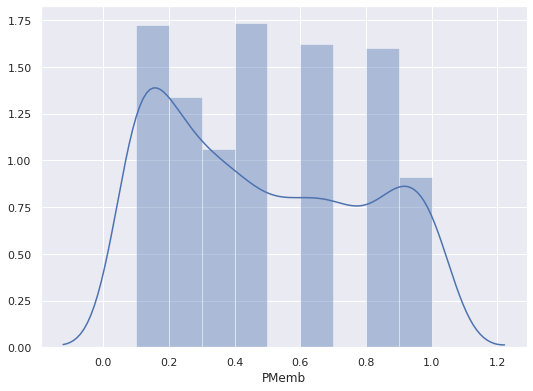

In [25]:
# histogram of PMemb in the training data
sns.distplot(training_set['PMemb'])
plt.show()

In [26]:
# Probable members (PMemb >= 0.5) in this dataset
len(training_set[training_set['PMemb'] >= 0.5])

769

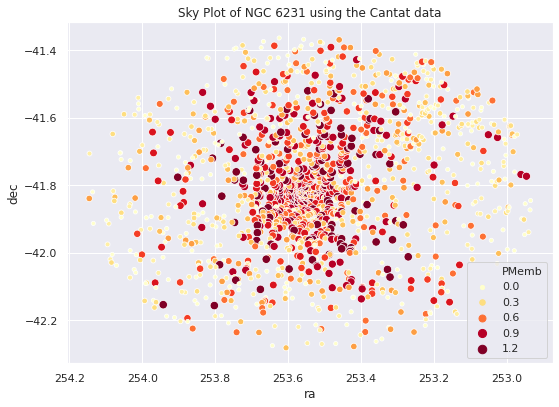

In [27]:
sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot(x = 'ra', y='dec', hue='PMemb', palette='YlOrRd', size = 'PMemb', data = training_set)
skyplot.invert_xaxis()
plt.title('Sky Plot of NGC 6231 using the Cantat data')
plt.show()

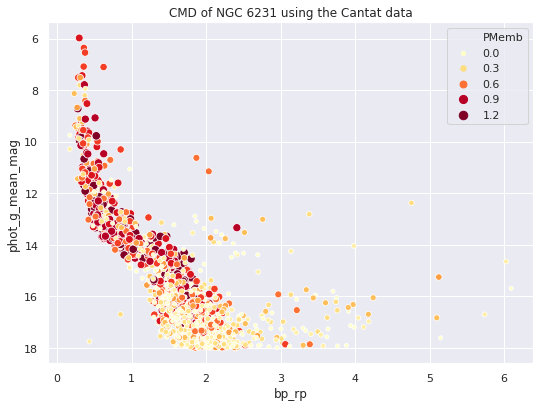

In [28]:
# CMD marked with the membership probabilities of the stars 
# (PMemb >= 0.5 stars are the probable stars)
cmd = sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag', hue='PMemb', palette='YlOrRd', size = 'PMemb', data = training_set)
cmd.invert_yaxis()
plt.title('CMD of NGC 6231 using the Cantat data')
plt.show()

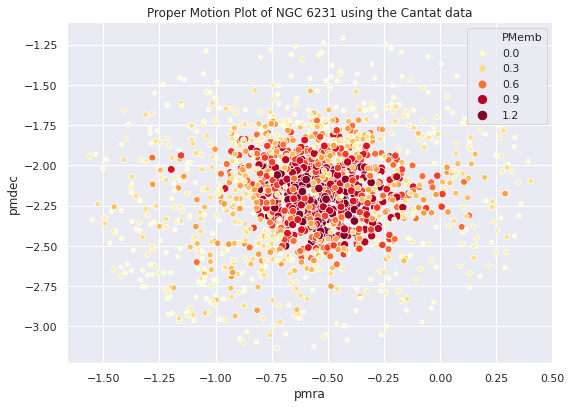

In [29]:
# proper motion plot marked with the membership probabilities of the stars 

pm_plot = sns.scatterplot(x = 'pmra', y='pmdec', hue='PMemb', palette='YlOrRd', size = 'PMemb', data = training_set)
plt.title('Proper Motion Plot of NGC 6231 using the Cantat data')
plt.show()

In [30]:
# Use Random Forest on whole dataset using 100 different trees 
rfr = RandomForestRegressor(n_estimators = 100, oob_score = True)
rfr.fit(features, targets)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [31]:
# checking the feature importance, 
# ( this is higher for a variable if the model efficiency become lower as we remove that variable)
feature_imp = pd.Series(rfr.feature_importances_, index=features.columns).sort_values(ascending = False)
feature_imp

parallax_over_error    0.283055
pmdec                  0.224888
pmra                   0.211326
dist_6231_center       0.103807
parallax               0.052174
dec                    0.018146
phot_g_mean_mag        0.017939
ra                     0.017765
bp_rp                  0.016999
ra_error               0.012754
pmra_error             0.011852
dec_error              0.010746
parallax_error         0.009485
pmdec_error            0.009065
dtype: float64

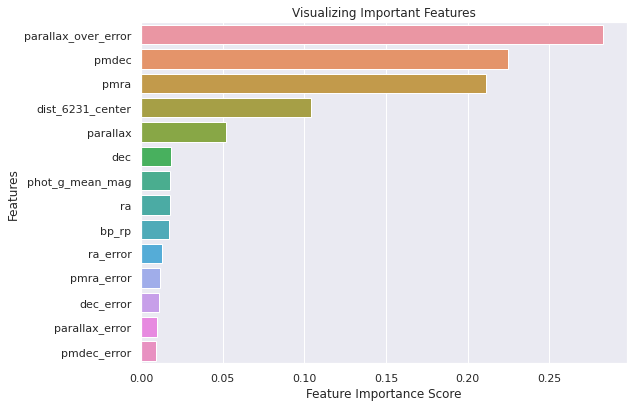

In [32]:
# plotting as a barplot

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Estimating the Model Accuracy in Test Data

In [0]:
# function for splitting a given dataset into training and test dataset

import random
# X = predictors, Y = target
def test_train_split(X, Y, test_ratio):
  ntest = int(len(X)*test_ratio) 
  ntrain = int(len(X) - ntest)

  # randomly select ntest number of rows from the full dataset as test_index and mark others as train_index.
  ind_test = random.sample(range(len(X)), k = ntest)
  ind_train = list(set(range(len(X))) - set(ind_test))

  # test and train dataset has the observations of test_indices and train_indices respectively
  test_X = X.iloc[ind_test]
  test_Y = Y.iloc[ind_test]

  train_X = X.iloc[ind_train]
  train_Y = Y.iloc[ind_train]

  return test_X, test_Y, train_X, train_Y

In [0]:
# splitting our dataset using 0.3 test ratio (30% test data, 70% train data)
test_features, test_targets, train_features, train_targets = test_train_split(features, targets, 0.3)


In [35]:
# train the model using only training subset
rfr.fit(train_features, train_targets)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [36]:
# find the accuracy rate to predict the outcome for test subset
test_predict = rfr.predict(test_features)
rfr.score(test_features, test_targets)

0.7588809541865739

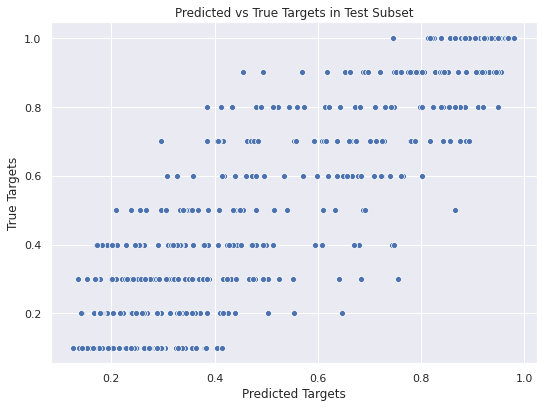

In [37]:
# plot Predicted vs True Targets in Test Subset

sns.scatterplot(test_predict, test_targets)
plt.title('Predicted vs True Targets in Test Subset')
plt.ylabel('True Targets')
plt.xlabel('Predicted Targets')
plt.show()

In [38]:
# Check with different test ratio

test_ratio = np.linspace(0.95, 0.05, 19)
print(test_ratio)

[0.95 0.9  0.85 0.8  0.75 0.7  0.65 0.6  0.55 0.5  0.45 0.4  0.35 0.3
 0.25 0.2  0.15 0.1  0.05]


In [39]:
# for each test_ratio, estimate the accuracy of the model

accuracy_rate = []

rfr = RandomForestRegressor(n_estimators = 100, oob_score = True)

for ratio in test_ratio:
  
  accuracy = 0
  for iter in range(20):
    test_features, test_targets, train_features, train_targets = test_train_split(features, targets, ratio)

    # train the model using only training subset
    rfr.fit(train_features, train_targets)

    # find the accuracy rate to predict the outcome for test subset
    test_predict = rfr.predict(test_features)
    accuracy += rfr.score(test_features, test_targets)

  accuracy_rate.append(accuracy/20)

print(accuracy_rate)

[0.4988695279793748, 0.5970451485087601, 0.6476737153227796, 0.6902240646348193, 0.7070954966742515, 0.7091655153634207, 0.7294890530278779, 0.7331303456232685, 0.7367262927826429, 0.746014090743299, 0.7475278419898695, 0.7479194595568331, 0.7542872854548055, 0.7550497261299746, 0.7566729186265968, 0.7585429912763109, 0.7704771890500264, 0.770382848813616, 0.75041529808042]


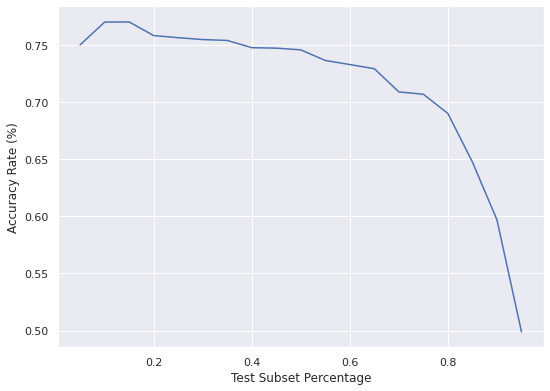

In [40]:
# plotting the accuracy rate vs test-ratio

sns.lineplot(test_ratio, accuracy_rate)
plt.xlabel('Test Subset Percentage')
plt.ylabel('Accuracy Rate (%)')
plt.show()

### Prediction of PMemb for the new stars

In [41]:
# descriptive stats
all_stars.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist
count,1.281940e+05,1.281940e+05,1.281940e+05,128194.0,128194.000000,128194.000000,128194.000000,128194.000000,78056.000000,78056.000000,78056.000000,78056.000000,78056.000000,78056.000000,78056.000000,128194.000000,78056.000000,78056.000000,78056.000000,78056.000000,78056.000000,78056.000000,78056.000000,78056.000000,78056.000000,128194.000000,128194.000000,128194.000000,128194.000000,128194.000000,1.281940e+05,128194.000000,128194.000000,128194.000000,128194.000000,77635.000000,77635.000000,128194.000000,128194.000000,128194.000000,...,108305.000000,108305.000000,128194.000000,1.085080e+05,108508.000000,108508.000000,108508.000000,108255.000000,128194.000000,108255.000000,108305.000000,108508.000000,360.000000,360.000000,128194.000000,360.000000,360.000000,360.000000,128194.000000,128194.000000,128194.000000,128194.000000,12143.000000,12143.000000,12143.000000,12143.000000,5786.000000,5786.000000,5786.000000,5786.000000,5786.000000,5786.000000,6632.0,6632.000000,6632.000000,6632.000000,6632.000000,6632.000000,6632.000000,128194.000000
mean,1.635721e+18,5.967067e+18,8.471273e+08,2015.5,253.478026,3.067259,-41.798124,1.795157,0.444264,0.456623,2.693098,-1.964208,0.981184,-3.395277,0.591813,0.337090,-0.104789,-0.202202,-0.122600,-0.186353,-0.151015,-0.667846,-0.072804,0.352348,0.247241,146.763546,1.233591,145.937680,0.825865,3.833141,5.115691e+02,1.652680,14.077097,20.048910,2.702045,1.314715,0.078163,0.160463,16.868403,8.882194,...,36.117657,19.897102,13.377678,8.830391e+03,42.313188,90.312225,17.752567,1.974824,0.269287,2.147310,0.793577,1.353822,-23.316299,2.051640,0.015399,4951.388672,3.176389,-0.020833,343.454799,1.237611,257.034888,-19.099926,100744.955612,4388.189941,4188.901855,4703.208008,1.859003,1.616586,2.118961,0.937089,0.811744,1.071330,200111.0,2.784431,2.459360,3.026017,18.816563,15.683868,21.949242,0.341690
std,0.000000e+00,1.408976e+15,4.886157e+08,0.0,0.346172,5.508554,0.249656,2.913686,0.905848,0.335647,6.020828,3.884834,0.833456,4.043295,0.454470,0.383735,0.210483,0.264561,0.200560,0.225630,0.209378,0.105057,0.203476,0.184657,0.250000,50.261129,15.705506,50.012938,1.294768,10.762758,2.053345e+04,1.927445,524.754780,13.664026,21.134569,0.150792,0.056834,0.104583,5.639696,2.410681,...,103.787231,1.549264,7.934746,3.793229e+05,1496.770631,279.564941,1.463335,0.621267,0.649732,0.730483,0.683735,0.322248,33.166981,3.090430,0.318738,612.995850,0.369631,0.175789,0.236776,0.269938,0.276871,0.245894,3786.414718,763.329651,753.005005,787.317871,0.833130,0.870354,0.811098,0.425491,0.443256,0.417003,0.0,4.052165,3.582986,4.370173,398.895416,309.832703,489.340332,0.121570
min,1.635721e+18,5.964945e+18,2.686600e+04,2015.5,

In [0]:
### adding their distance from the center of the clusters

## NGC 6231
center = coord.SkyCoord.from_name('NGC6231')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( (all_stars['ra'] - center_ra)**2 + (all_stars['dec'] - center_dec)**2 )
all_stars['dist_6231_center'] = distance

In [0]:
all_stars = all_stars.dropna(subset = feature_columns)

In [0]:
# select the set of predictor variables from the new dataset
new_features = all_stars.loc[:, feature_columns]
new_features = new_features.astype('float32')

In [45]:
# train the model again using all the features and targets of the previous dataset
rfr.fit(features, targets)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [46]:
# estimate the membership probability of the stars
all_stars['PMemb'] = rfr.predict(new_features)
sum(all_stars['PMemb'] >= 0.5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


780

In [47]:
potentialMember = all_stars[all_stars['PMemb'] >= 0.5]
len(potentialMember)

780

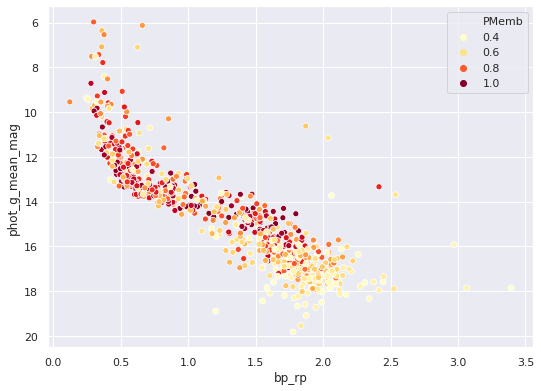

In [48]:
# CMD of probable members 

cmd = sns.scatterplot(x = 'bp_rp', y = 'phot_g_mean_mag', hue= 'PMemb', 
                      palette='YlOrRd', data = all_stars[all_stars['PMemb'] >= 0.5] )
cmd.invert_yaxis()

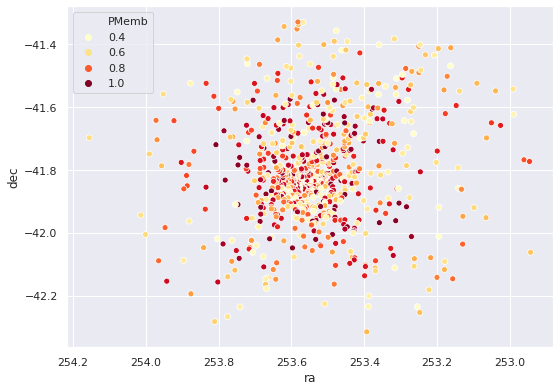

In [49]:
skyplot = sns.scatterplot(x = 'ra', y = 'dec', hue= 'PMemb', 
                      palette='YlOrRd', data = all_stars[all_stars['PMemb'] >= 0.5] )
skyplot.invert_xaxis()

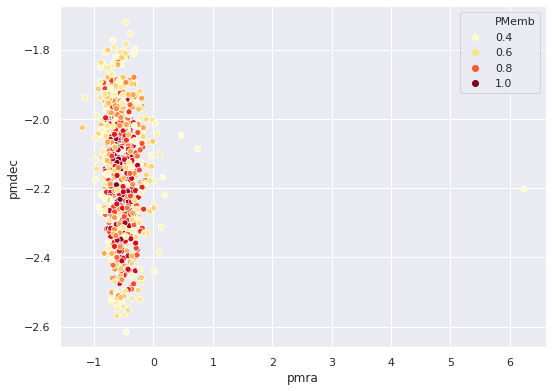

In [50]:
# pm plot
sns.scatterplot(x = 'pmra', y = 'pmdec', hue= 'PMemb', 
                      palette='YlOrRd', data = all_stars[all_stars['PMemb'] >= 0.5] )

In [51]:
potentialMember.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,dist_6231_center,PMemb
count,7.800000e+02,7.800000e+02,7.800000e+02,780.0,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.0,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,...,780.000000,7.800000e+02,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,4.000000,4.000000,780.000000,4.000000,4.000,4.000,780.000000,780.000000,780.000000,780.000000,665.000000,665.000000,665.000000,665.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,576.0,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,780.000000,780.000000,780.000000
mean,1.635721e+18,5.966610e+18,8.508572e+08,2015.5,253.532535,0.061652,-41.801223,0.052701,0.625609,0.072813,11.694172,-0.522687,0.127175,-2.153879,0.092939,0.045810,-0.173777,-0.339555,-0.068184,-0.287507,0.026416,-0.734943,-0.144217,0.374228,-0.051100,208.230769,49.700000,206.042308,2.188462,1.995917,334.410431,0.071520,2.167510,31.0,85.902290,1.526215,0.012431,0.092689,23.758974,11.205128,...,22.034615,3.735706e+05,1023.028505,528.993530,13.796959,1.310858,0.125641,1.237824,0.536790,0.701034,-31.889189,4.168629,0.029487,5250.000000,3.125,-0.375,343.478409,1.204327,257.077992,-19.097891,100091.368421,5572.584473,5339.941895,5904.048340,1.597549,1.261026,1.923673,0.804528,0.632973,0.974125,200111.0,3.788846,3.413469,4.092002,94.049675,81.558182,106.541199,0.170470,0.191333,0.750247
std,0.000000e+00,7.980596e+14,4.656316e+08,0.0,0.159452,0.046941,0.172444,0.042295,0.153809,0.062506,5.360903,0.317274,0.105152,0.175615,0.078205,0.180286,0.155454,0.188480,0.153721,0.151903,0.163302,0.080392,0.130312,0.129947,0.230330,30.398518,91.013688,29.706515,3.384875,8.344586,1979.364990,0.172116,36.950392,0.0,113.331932,0.123370,0.010595,0.056022,3.467192,0.929601,...,4.973107,2.625056e+06,7769.975645,431.597412,2.081338,0.136482,0.331657,0.606755,0.316611,0.305349,15.039944,7.721860,0.453657,866.025391,0.250,0.750,0.144286,0.151850,0.129655,0.169869,415.399004,1405.106689,1352.804688,1455.746216,0.680072,0.670421,0.731856,0.346999,0.340949,0.375433,0.0,5.201925,4.846852,5.465762,653.516357,564.884827,742.481506,0.124168,0.138432,0.153283
min,1.635721e+18,5.964946e+18,3.899407e+06,2015.5,252.942956,0.021023,-42.315023,0.018408,0.362160,0.023844,0.774688,-1.197033,0.042337,-2.614623,0.031957,-0.869595,-0.850281,-0.911893,-0.649230,-0.777525,-0.661534,-0.971674,-0.709552,-0.299524,-0.868255,66.000000,0.000000,66.000

In [52]:
member.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,PMemb,dist_6231_center
count,1.580000e+03,1.580000e+03,1.580000e+03,1580.0,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1.580000e+03,1580.0,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,...,1580.000000,1.566000e+03,1566.000000,1566.000000,1566.000000,1566.000000,1580.000000,1566.000000,1566.000000,1566.000000,9.000000,9.000000,1580.000000,9.000000,9.000000,9.000000,1580.000000,1580.000000,1580.000000,1580.000000,1083.000000,1083.000000,1083.000000,1083.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,811.0,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,1580.000000,1580.000000,1580.000000
mean,1.635721e+18,5.966777e+18,8.573163e+08,2015.5,253.526296,0.080140,-41.796666,0.066531,0.580582,0.092637,8.996444,-0.593184,0.169760,-2.169458,0.118343,0.086909,-0.171935,-0.295309,-0.097723,-0.275163,-0.022732,-0.713938,-0.148311,0.365673,0.033076,198.854430,30.893671,197.177215,1.677215,2.273248,270.693878,0.124346,1.935921e+00,31.0,54.530579,1.469439,0.016071,0.095778,22.700000,11.087342,...,21.015823,1.946679e+05,552.200162,413.097931,14.589313,1.358732,0.118987,1.577686,0.740594,0.837092,-40.064345,2.654596,0.032911,4944.444336,3.055556,-0.166667,343.478886,1.210767,257.072509,-19.094001,100106.397969,5204.823730,4982.423340,5544.394043,1.860792,1.554186,2.163760,0.937166,0.777019,1.094345,200111.0,3.651327,3.259030,3.949239,68.250198,58.908226,77.592224,0.224395,0.487215,0.259146
std,0.000000e+00,1.078450e+15,4.764143e+08,0.0,0.232189,0.048331,0.194087,0.039327,0.080668,0.055667,5.454489,0.357242,0.111263,0.333601,0.071889,0.189607,0.163353,0.196493,0.162895,0.158466,0.176634,0.083065,0.139082,0.132372,0.241784,31.085395,75.480475,30.417866,2.763347,6.015348,315.855042,0.194258,1.058530e+01,0.0,98.556709,0.129758,0.009690,0.057908,3.544863,0.981768,...,5.144930,1.586840e+06,4956.763339,390.964050,2.005230,0.152253,0.346548,0.754850,0.469122,0.312959,43.334732,4.961407,0.475018,634.647766,0.166667,0.500000,0.170287,0.196591,0.187618,0.190261,446.780835,1391.591309,1348.295654,1424.386353,0.745452,0.767743,0.753557,0.378802,0.387698,0.387486,0.0,4.277451,3.951248,4.514437,534.412964,459.990906,609.025757,0.134840,0.304413,0.159268
min,1.635721e+18,5.964990e+18,1.993672e+06,2015.5,252.934608,0.021023,-42.281842,0.018408,0.422281,0.023844,1.541709,-1.561498,0.042337,-3.133929,0.031957,-0.869595,-0.850281,-0.929521,-0.867894,-0.785

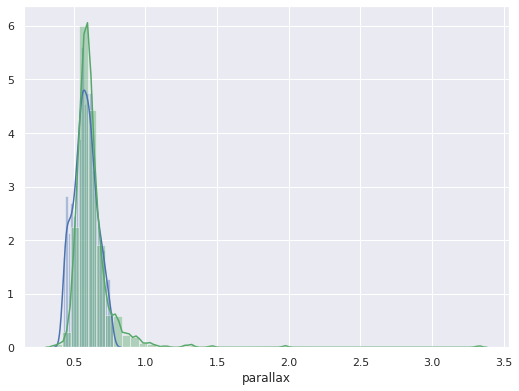

In [53]:
sns.distplot(member['parallax'], color = 'b')
sns.distplot(potentialMember['parallax'], color = 'g')

In [0]:
# saving the files as csv

# all_stars.to_csv('gaia_6231_membership_prob.csv')
potentialMember.to_csv('NGC_6231_membership_prob.csv')

### Comparing the new and old probable members

In [0]:
# creating subset for the potential member in previous dataset

potential_Old_Member = member[member['PMemb'] >= 0.5]


concatenated = pd.concat([potentialMember.assign(dataset='New_member'), potential_Old_Member.assign(dataset='Old_member')])


In [56]:
concatenated

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,dist_6231_center,PMemb,dataset
10,1635721458409799680,b'Gaia DR2 5966509885480902656',5966509885480902656,75674766,2015.5,253.541922,0.056999,-41.825049,0.043726,0.588630,0.058279,10.100193,-0.201992,0.109771,-2.076847,0.074812,0.125070,-0.217714,-0.378112,-0.167505,-0.118284,-0.103722,-0.684189,-0.034273,0.221695,0.002434,262,262,247,15,23.867315,1236.423462,0.180424,12.504582,31,False,25.615211,1.680406,0.011212,0.109587,...,5.785701,1.167947,0,0.298518,0.111281,0.187237,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',343.464436,1.183913,257.088354,-19.120643,100001.0,7947.00,7780.500000,8207.500000,0.2653,0.0740,0.6331,0.1430,0.0366,0.3428,200111.0,50.211166,47.074417,52.383160,9059.582031,7871.937500,10247.226562,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.005072,0.006663,0.796,New_member
19,1635721458409799680,b'Gaia DR2 5966509846818671872',5966509846818671872,994196143,2015.5,253.528953,0.042003,-41.823165,0.035386,0.500177,0.045313,11.038198,-0.618120,0.082720,-2.014752,0.060212,-0.022583,-0.186666,-0.400981,-0.029362,-0.225033,0.053416,-0.741887,-0.073413,0.306280,-0.143106,251,251,242,9,15.661293,766.168457,0.059859,1.374822,31,True,123.496727,1.711654,0.008832,0.089753,...,9.281498,1.170590,1,0.266615,0.095115,0.171500,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',343.459803,1.192602,257.077960,-19.119925,100002.0,8385.00,8145.500000,8634.250000,0.8830,0.7589,1.0181,0.4583,0.3856,0.5190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.005984,0.007388,0.617,New_member
29,1635721458409799680,b'Gaia DR2 5966509885480897792',5966509885480897792,311166037,2015.5,253.545663,0.054755,-41.827538,0.041098,0.522328,0.056883,9.182508,-0.739185,0.107318,-1.904268,0.071091,0.187194,-0.318994,-0.248488,-0.154496,-0.269648,-0.010938,-0.723689,-0.108310,0.321772,0.060399,214,214,204,10,15.438690,691.698792,0.087285,2.596582,31,False,77.344505,1.668033,0.010306,0.174881,...,9.886769,1.174598,0,0.344581,0.125320,0.219260,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',343.464262,1.180180,257.091598,-19.122782,100001.0,8046.50,7834.000000,8446.000000,0.6690,0.4880,1.0634,0.3483,0.2662,0.5140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.007647,0.010242,0.575,New_member
33,1635721458409799680,b'Gaia DR2 5966509782401678592',5966509782401678592,1377352669,2015.5,253.541979,0.034195,-41.833184,0.026995,0.555860,0.040938,13.577954,-0.352738,0.086079,-1.966265,0.044477,-0.285745,-0.232036,-0.156301,0.074591,0.112695,-0.028142,-0.646295,0.319773,0.021373,-0.109480,129,0,129,0,-1.312545,103.863762,0.000000,0.000000,31,False,115.166115,1.674507,0.006070,-0.040703,...,12.925723,1.211719,0,0.516440,0.171193,0.345247,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',343.458147,1.178751,257.0894

In [64]:
concatenated.dataset.value_counts()

New_member    780
Old_member    774
Name: dataset, dtype: int64

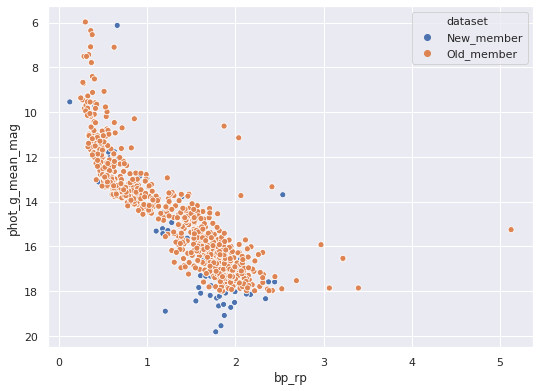

In [57]:
cmd = sns.scatterplot(x='bp_rp', y='phot_g_mean_mag', data=concatenated,
                hue='dataset')
cmd.invert_yaxis()

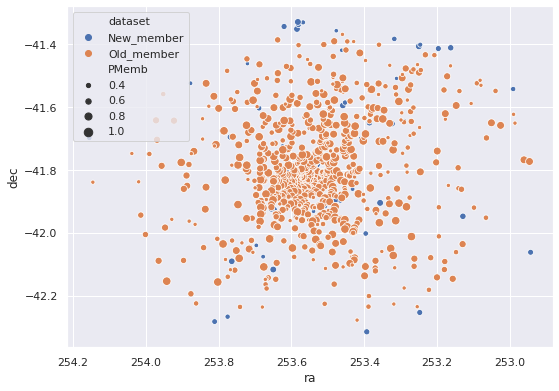

In [58]:
skyplot = sns.scatterplot(x='ra', y='dec', data=concatenated,
                size='PMemb', hue='dataset')
skyplot.invert_xaxis()

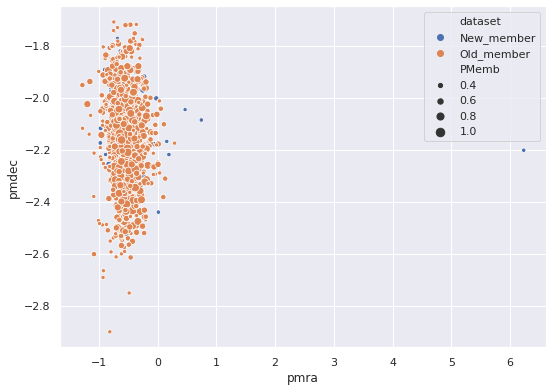

In [59]:
# proper motion plot

sns.scatterplot(x='pmra', y='pmdec', data=concatenated,
                size='PMemb', hue='dataset')

In [0]:
# pd_prof.ProfileReport(potentialMember)

In [0]:
import time
time.sleep(180)

In [0]:
files.download('NGC_6231_cantat.csv')
files.download('NGC_6231_membership_prob.csv')